In [382]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
import re

In [383]:
mails = pd.read_csv('aiml_dataset7_2.csv', encoding = 'latin-1')
mails.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,"z13uwn2heqndtr5g304ccv5j5kqqzxjadmc0k,Corey Wi...",NaN,NaN,NaN,NaN
1,z124jvczaz3dxhnbc04cffk43oiugj25yzo0k,Epic Gaming,2015-05-28T20:07:20.610000,wierd but funnyï»¿,0.0
2,"z13tczjy5xj0vjmu5231unho1ofey5zdk,LaS Music,20...",NaN,NaN,NaN,NaN
3,z13tzr0hdpnayhqqc04cd3zqqqjkf3ngckk0k,Cheryl Fox,2015-05-28T17:49:35.294000,Party Rock....lol...who wants to shuffle!!!ï»¿,0.0
4,z12pcvix4zedcjvyb04ccr1r0mr2g5xwyng0k,PATRICK_TW,2015-05-28T16:28:26.818000,Party rockï»¿,0.0


In [384]:
mails.drop(['COMMENT_ID', 'AUTHOR', 'DATE'], axis = 1, inplace = True)
mails.head()

,CONTENT,CLASS
0,NaN,NaN
1,wierd but funnyï»¿,0.0
2,NaN,NaN
3,Party Rock....lol...who wants to shuffle!!!ï»¿,0.0
4,Party rockï»¿,0.0


In [385]:
mails = mails.dropna()
mails

,CONTENT,CLASS
1,wierd but funnyï»¿,0.0
3,Party Rock....lol...who wants to shuffle!!!ï»¿,0.0
4,Party rockï»¿,0.0
5,Shuffleï»¿,0.0
6,Omgï»¿,0.0
...,...,...
433,Like this comment for no reasonï»¿,1.0
434,love this songï»¿,0.0
435,this song is awesome. these guys are the best....,1.0
436,HOW MANY THUMBS UP FOR LOUIS SAVING THE DAY!?!...,1.0


In [386]:
mails['CLASS'].value_counts()

,count
CLASS,
1.0,192
0.0,163


In [387]:
mails['CONTENT'] = mails['CONTENT'].str.replace('ï»¿', '')
mails.head()

,CONTENT,CLASS
1,wierd but funny,0.0
3,Party Rock....lol...who wants to shuffle!!!,0.0
4,Party rock,0.0
5,Shuffle,0.0
6,Omg,0.0


In [388]:
mails = mails.reset_index(drop=True)

totalMails = 192 + 163
trainIndex, testIndex = list(), list()
for i in range(mails.shape[0]):
    if np.random.uniform(0, 1) < 0.9:
        trainIndex += [i]
    else:
        testIndex += [i]

trainData = mails.loc[trainIndex]
testData = mails.loc[testIndex]

In [389]:
trainData.reset_index(inplace = True)
trainData.drop(['index'], axis = 1, inplace = True)
trainData.head()

,CONTENT,CLASS
0,wierd but funny,0.0
1,Party Rock....lol...who wants to shuffle!!!,0.0
2,Party rock,0.0
3,Shuffle,0.0
4,Omg,0.0


In [390]:
testData.reset_index(inplace = True)
testData.drop(['index'], axis = 1, inplace = True)
testData.head()

,CONTENT,CLASS
0,2015 LIKEEE,0.0
1,2011- the last year of decent music.,0.0
2,wowwwwwwwwwwwwwwwwwwwwwwwwwwwwww,0.0
3,PARTY ROCK (8) ~,0.0
4,just :( superr!!!,0.0


In [391]:
trainData['CLASS'].value_counts()

,count
CLASS,
1.0,174
0.0,141


In [392]:
testData['CLASS'].value_counts()

,count
CLASS,
0.0,22
1.0,18


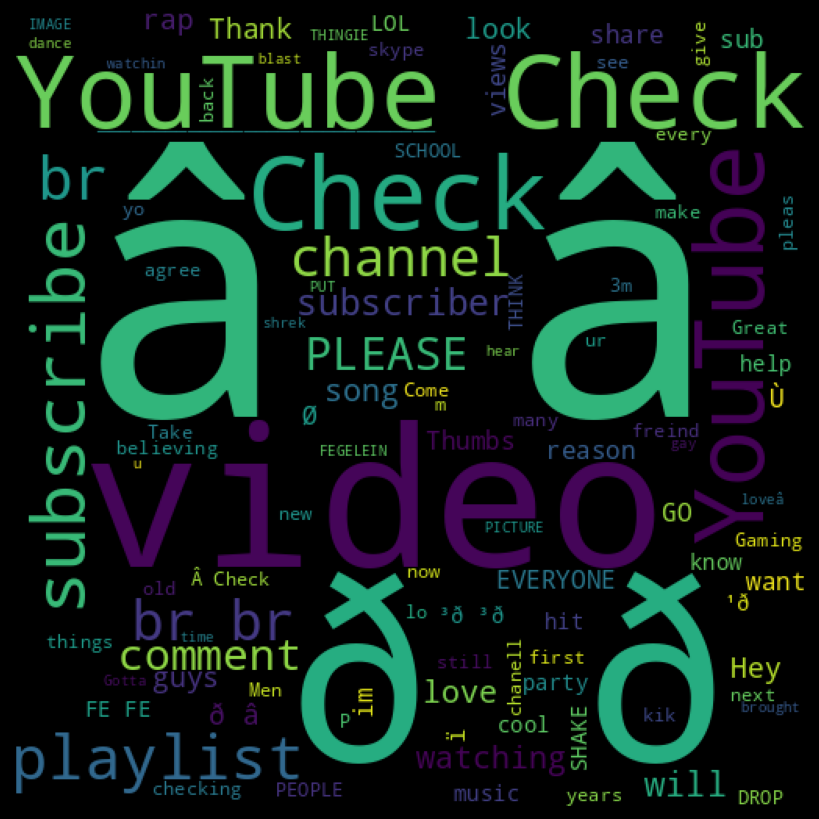

In [393]:
spam_words = ' '.join(list(mails[mails['CLASS'] == 1]['CONTENT']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

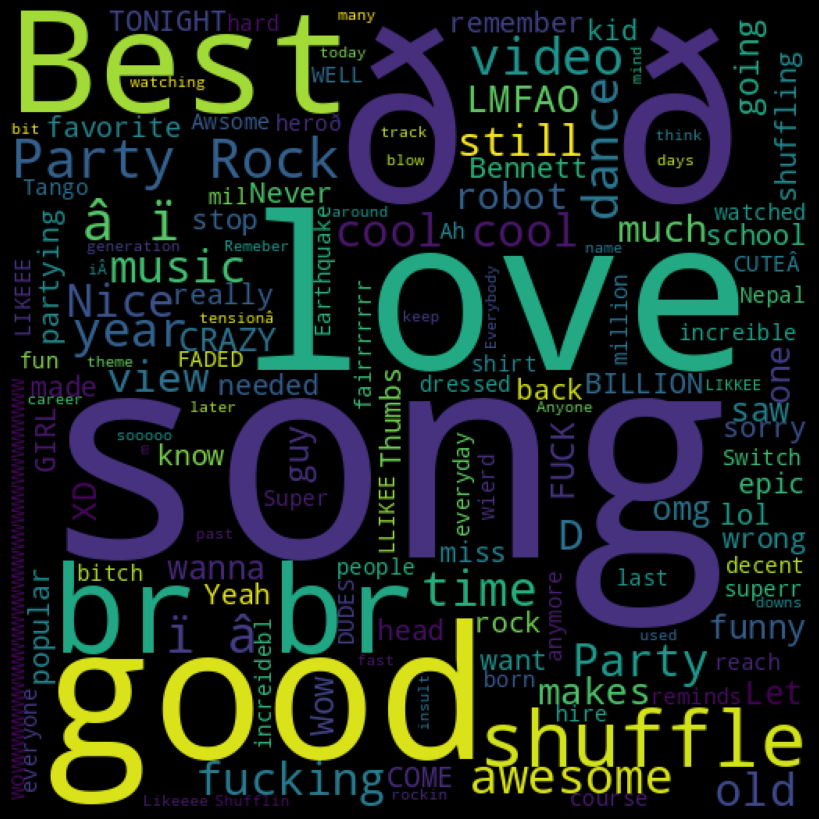

In [394]:
ham_words = ' '.join(list(mails[mails['CLASS'] == 0]['CONTENT']))
ham_wc = WordCloud(width = 512,height = 512).generate(ham_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [395]:
trainData.head()

,CONTENT,CLASS
0,wierd but funny,0.0
1,Party Rock....lol...who wants to shuffle!!!,0.0
2,Party rock,0.0
3,Shuffle,0.0
4,Omg,0.0


In [396]:
trainData['CLASS'].value_counts()

,count
CLASS,
1.0,174
0.0,141


In [397]:
testData.head()

,CONTENT,CLASS
0,2015 LIKEEE,0.0
1,2011- the last year of decent music.,0.0
2,wowwwwwwwwwwwwwwwwwwwwwwwwwwwwww,0.0
3,PARTY ROCK (8) ~,0.0
4,just :( superr!!!,0.0


In [398]:
testData['CLASS'].value_counts()

,count
CLASS,
0.0,22
1.0,18


In [399]:
def process_message(message, lower_case = True, stem = True, stop_words = True, gram = 2):
    if lower_case:
        message = message.lower()
    words = word_tokenize(message)
    words = [w for w in words if len(w) > 2]
    if gram > 1:
        w = []
        for i in range(len(words) - gram + 1):
            w += [' '.join(words[i:i + gram])]
        return w
    if stop_words:
        sw = stopwords.words('english')
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]
    return words

In [400]:
class SpamClassifier(object):
    def __init__(self, trainData, method = 'tf-idf'):
        self.mails, self.labels = trainData['CONTENT'], trainData['CLASS']
        self.method = method

    def train(self):
        self.calc_TF_and_IDF()
        if self.method == 'tf-idf':
            self.calc_TF_IDF()
        else:
            self.calc_prob()

    def calc_prob(self):
        self.prob_spam = dict()
        self.prob_ham = dict()
        for word in self.tf_spam:
            self.prob_spam[word] = (self.tf_spam[word] + 1) / (self.spam_words + \
                                                                len(list(self.tf_spam.keys())))
        for word in self.tf_ham:
            self.prob_ham[word] = (self.tf_ham[word] + 1) / (self.ham_words + \
                                                                len(list(self.tf_ham.keys())))
        self.prob_spam_mail, self.prob_ham_mail = self.spam_mails / self.total_mails, self.ham_mails / self.total_mails


    def calc_TF_and_IDF(self):
        noOfMessages = self.mails.shape[0]
        self.spam_mails, self.ham_mails = self.labels.value_counts()[1], self.labels.value_counts()[0]
        self.total_mails = self.spam_mails + self.ham_mails
        self.spam_words = 0
        self.ham_words = 0
        self.tf_spam = dict()
        self.tf_ham = dict()
        self.idf_spam = dict()
        self.idf_ham = dict()
        for i in range(noOfMessages):
            message_processed = process_message(self.mails[i])
            count = list() #To keep track of whether the word has ocured in the message or not.
                           #For IDF
            for word in message_processed:
                if self.labels[i]:
                    self.tf_spam[word] = self.tf_spam.get(word, 0) + 1
                    self.spam_words += 1
                else:
                    self.tf_ham[word] = self.tf_ham.get(word, 0) + 1
                    self.ham_words += 1
                if word not in count:
                    count += [word]
            for word in count:
                if self.labels[i]:
                    self.idf_spam[word] = self.idf_spam.get(word, 0) + 1
                else:
                    self.idf_ham[word] = self.idf_ham.get(word, 0) + 1

    def calc_TF_IDF(self):
        self.prob_spam = dict()
        self.prob_ham = dict()
        self.sum_tf_idf_spam = 0
        self.sum_tf_idf_ham = 0
        for word in self.tf_spam:
            self.prob_spam[word] = (self.tf_spam[word]) * log((self.spam_mails + self.ham_mails) \
                                                          / (self.idf_spam[word] + self.idf_ham.get(word, 0)))
            self.sum_tf_idf_spam += self.prob_spam[word]
        for word in self.tf_spam:
            self.prob_spam[word] = (self.prob_spam[word] + 1) / (self.sum_tf_idf_spam + len(list(self.prob_spam.keys())))

        for word in self.tf_ham:
            self.prob_ham[word] = (self.tf_ham[word]) * log((self.spam_mails + self.ham_mails) \
                                                          / (self.idf_spam.get(word, 0) + self.idf_ham[word]))
            self.sum_tf_idf_ham += self.prob_ham[word]
        for word in self.tf_ham:
            self.prob_ham[word] = (self.prob_ham[word] + 1) / (self.sum_tf_idf_ham + len(list(self.prob_ham.keys())))


        self.prob_spam_mail, self.prob_ham_mail = self.spam_mails / self.total_mails, self.ham_mails / self.total_mails

    def classify(self, processed_message):
        pSpam, pHam = 0, 0
        for word in processed_message:
            if word in self.prob_spam:
                pSpam += log(self.prob_spam[word])
            else:
                if self.method == 'tf-idf':
                    pSpam -= log(self.sum_tf_idf_spam + len(list(self.prob_spam.keys())))
                else:
                    pSpam -= log(self.spam_words + len(list(self.prob_spam.keys())))
            if word in self.prob_ham:
                pHam += log(self.prob_ham[word])
            else:
                if self.method == 'tf-idf':
                    pHam -= log(self.sum_tf_idf_ham + len(list(self.prob_ham.keys())))
                else:
                    pHam -= log(self.ham_words + len(list(self.prob_ham.keys())))
            pSpam += log(self.prob_spam_mail)
            pHam += log(self.prob_ham_mail)
        return pSpam >= pHam

    def predict(self, testData):
        result = dict()
        for (i, message) in enumerate(testData):
            processed_message = process_message(message)
            result[i] = int(self.classify(processed_message))
        return result

In [401]:
def metrics(labels, predictions):
    true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0
    for i in range(len(labels)):
        true_pos += int(labels[i] == 1 and predictions[i] == 1)
        true_neg += int(labels[i] == 0 and predictions[i] == 0)
        false_pos += int(labels[i] == 0 and predictions[i] == 1)
        false_neg += int(labels[i] == 1 and predictions[i] == 0)
    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    Fscore = 2 * precision * recall / (precision + recall)
    accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F-score: ", Fscore)
    print("Accuracy: ", accuracy)

In [402]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [403]:
sc_tf_idf = SpamClassifier(trainData, 'tf-idf')
sc_tf_idf.train()
preds_tf_idf = sc_tf_idf.predict(testData['CONTENT'])
metrics(testData['CLASS'], preds_tf_idf)

Precision:  0.8095238095238095
Recall:  0.9444444444444444
F-score:  0.8717948717948718
Accuracy:  0.875


In [404]:
sc_bow = SpamClassifier(trainData, 'bow')
sc_bow.train()
preds_bow = sc_bow.predict(testData['CONTENT'])
metrics(testData['CLASS'], preds_bow)

Precision:  0.8333333333333334
Recall:  0.8333333333333334
F-score:  0.8333333333333334
Accuracy:  0.85


In [405]:
pm = process_message('I cant pick the phone right now. Pls send a message')
sc_tf_idf.classify(pm)

False

In [406]:
pm = process_message('Congratulations you are awarded $500 ')
sc_tf_idf.classify(pm)

False

In [407]:
pm = process_message('you are awarded')
sc_tf_idf.classify(pm)

True

In [408]:
pm = process_message('Pls send a message, i will give you 100$')
sc_tf_idf.classify(pm)

True

In [409]:
pm = process_message('Check my video in youtube')
sc_tf_idf.classify(pm)

True

In [410]:
pm = process_message('Interestion view')
sc_tf_idf.classify(pm)

False

In [411]:
pm = process_message('Interestion view || check my video in my youtube chanel')
sc_tf_idf.classify(pm)

True

In [412]:
pm = process_message('Interestion view || check my view in my youtube chanel ')
sc_tf_idf.classify(pm)

False